In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the BTC dataset
column_names = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']

df = pd.read_csv('/content/BNBUSDT (1).csv', header=None, names=column_names)

# Display the first few rows of the data
df.head()

/tmp/ipython-input-3-3894497403.py:4: DtypeWarning: Columns (1,2,3,4,5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/BNBUSDT (1).csv', header=None, names=column_names)


,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
1,2017-11-06 03:54:00,1.5,1.5,1.5,1.5,10.83,2017-11-06 03:54:59.999,16.245,2,10.83,16.245,0
2,2017-11-06 03:55:00,1.3,1.3,1.3,1.3,1.0,2017-11-06 03:55:59.999,1.3,1,0.0,0.0,0
3,2017-11-06 03:56:00,1.3,1.3,0.5,0.5,19.0,2017-11-06 03:56:59.999,24.356,6,0.33,0.429,0
4,2017-11-06 03:57:00,0.5,0.61,0.5,0.61,253.0,2017-11-06 03:57:59.999,151.66,17,0.0,0.0,0


In [ ]:
# Check data types
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
timestamp                       object
open                            object
high                            object
low                             object
close                           object
volume                          object
close_time                      object
quote_asset_volume              object
number_of_trades                object
taker_buy_base_asset_volume     object
taker_buy_quote_asset_volume    object
ignore                          object
dtype: object


In [ ]:
# Step 1: Identify columns to convert
numeric_columns = ['open', 'high', 'low', 'close', 'volume',
                   'quote_asset_volume', 'number_of_trades',
                   'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']

# Step 2: Convert object columns to numeric
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 3: Check for NaN values
print("NaN values in each column after conversion:")
print(df.isna().sum())

# Step 4: Handle NaN values (example: fill with 0 or drop rows)
df.fillna(0, inplace=True)
# Alternatively, to drop rows with NaN values
# df.dropna(inplace=True)

# Verify the data types after conversion
print("Data types after conversion:")
print(df.dtypes)

NaN values in each column after conversion:
timestamp                       0
open                            1
high                            1
low                             1
close                           1
volume                          1
close_time                      0
quote_asset_volume              1
number_of_trades                1
taker_buy_base_asset_volume     1
taker_buy_quote_asset_volume    1
ignore                          0
dtype: int64
Data types after conversion:
timestamp                        object
open                            float64
high                            float64
low                             float64
close                           float64
volume                          float64
close_time                       object
quote_asset_volume              float64
number_of_trades                float64
taker_buy_base_asset_volume     float64
taker_buy_quote_asset_volume    float64
ignore                           object
dtype: object


In [ ]:
# Display the columns of the DataFrame
print(df.columns)

# Display the first few rows of the DataFrame
print(df.head())

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignore'],
      dtype='object')
             timestamp  open  high  low  close  volume  \
0            timestamp   0.0  0.00  0.0   0.00    0.00   
1  2017-11-06 03:54:00   1.5  1.50  1.5   1.50   10.83   
2  2017-11-06 03:55:00   1.3  1.30  1.3   1.30    1.00   
3  2017-11-06 03:56:00   1.3  1.30  0.5   0.50   19.00   
4  2017-11-06 03:57:00   0.5  0.61  0.5   0.61  253.00   

                close_time  quote_asset_volume  number_of_trades  \
0               close_time               0.000               0.0   
1  2017-11-06 03:54:59.999              16.245               2.0   
2  2017-11-06 03:55:59.999               1.300               1.0   
3  2017-11-06 03:56:59.999              24.356               6.0   
4  2017-11-06 03:57:59.999             151.660              17.0   

   taker_buy_b

In [ ]:
# Display rows with NaN values
print(df[df.isna().any(axis=1)])

Empty DataFrame
Columns: [timestamp, open, high, low, close, volume, close_time, quote_asset_volume, number_of_trades, taker_buy_base_asset_volume, taker_buy_quote_asset_volume, ignore]
Index: []


In [ ]:
# Drop rows with any NaN values
df_cleaned = df.dropna()

In [ ]:
# Check the first few values in the timestamp column
print(df['timestamp'].head())

0              timestamp
1    2017-11-06 03:54:00
2    2017-11-06 03:55:00
3    2017-11-06 03:56:00
4    2017-11-06 03:57:00
Name: timestamp, dtype: object


In [ ]:
# Step 1: Remove any rows that are not valid timestamps
# Remove the first row if it contains the string "timestamp"
df = df[df['timestamp'] != 'timestamp']

# Step 2: Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

# Step 3: Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 4: Convert the timestamp to numeric (UNIX timestamp)
df['timestamp_numeric'] = df['timestamp'].astype('int64') // 10**9  # Convert to seconds

# Display the DataFrame with the numeric timestamp
print(df[['timestamp', 'timestamp_numeric']])

                  timestamp  timestamp_numeric
0       2017-11-06 03:54:00         1509940440
1       2017-11-06 03:55:00         1509940500
2       2017-11-06 03:56:00         1509940560
3       2017-11-06 03:57:00         1509940620
4       2017-11-06 03:58:00         1509940680
...                     ...                ...
3921490 2025-04-27 02:56:00         1745722560
3921491 2025-04-27 02:57:00         1745722620
3921492 2025-04-27 02:58:00         1745722680
3921493 2025-04-27 02:59:00         1745722740
3921494 2025-04-27 03:00:00         1745722800

[3921495 rows x 2 columns]


In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

            timestamp  open  high  low  close  volume  \
0 2017-11-06 03:54:00   1.5  1.50  1.5   1.50   10.83   
1 2017-11-06 03:55:00   1.3  1.30  1.3   1.30    1.00   
2 2017-11-06 03:56:00   1.3  1.30  0.5   0.50   19.00   
3 2017-11-06 03:57:00   0.5  0.61  0.5   0.61  253.00   
4 2017-11-06 03:58:00   1.1  1.10  1.1   1.10   85.00   

                close_time  quote_asset_volume  number_of_trades  \
0  2017-11-06 03:54:59.999              16.245               2.0   
1  2017-11-06 03:55:59.999               1.300               1.0   
2  2017-11-06 03:56:59.999              24.356               6.0   
3  2017-11-06 03:57:59.999             151.660              17.0   
4  2017-11-06 03:58:59.999              93.500               1.0   

   taker_buy_base_asset_volume  taker_buy_quote_asset_volume ignore  \
0                        10.83                        16.245      0   
1                         0.00                         0.000      0   
2                         0.33     

In [ ]:
# Step 2: Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

# Step 3: Convert the close_time column to datetime
df['close_time'] = pd.to_datetime(df['close_time'])

# Step 4: Convert the close_time to numeric (UNIX timestamp)
df['close_time_numeric'] = df['close_time'].astype('int64') // 10**9  # Convert to seconds

# Display the DataFrame with the numeric close_time
print(df[['close_time', 'close_time_numeric']])

                     close_time  close_time_numeric
0       2017-11-06 03:54:59.999          1509940499
1       2017-11-06 03:55:59.999          1509940559
2       2017-11-06 03:56:59.999          1509940619
3       2017-11-06 03:57:59.999          1509940679
4       2017-11-06 03:58:59.999          1509940739
...                         ...                 ...
3921490 2025-04-27 02:56:59.999          1745722619
3921491 2025-04-27 02:57:59.999          1745722679
3921492 2025-04-27 02:58:59.999          1745722739
3921493 2025-04-27 02:59:59.999          1745722799
3921494 2025-04-27 03:00:59.999          1745722859

[3921495 rows x 2 columns]


In [ ]:
columns_to_drop = ['timestamp', 'close_time', 'ignore']  # Specify columns to drop
df.drop(columns=columns_to_drop, inplace=True)  # Drop columns

In [ ]:
# Verify the data types after conversion
print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
open                            float64
high                            float64
low                             float64
close                           float64
volume                          float64
quote_asset_volume              float64
number_of_trades                float64
taker_buy_base_asset_volume     float64
taker_buy_quote_asset_volume    float64
timestamp_numeric                 int64
close_time_numeric                int64
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Select relevant columns
data = df[['timestamp_numeric', 'close']]

# Split data into features and labels
X = data[['timestamp_numeric']].values
y = data['close'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Scale labels
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [ ]:
import numpy as np

def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# Create dataset with time step of 1
time_step = 1
X_train_lstm, y_train_lstm = create_dataset(X_train_scaled, y_train_scaled, time_step)
X_test_lstm, y_test_lstm = create_dataset(X_test_scaled, y_test_scaled, time_step)

# Reshape input to be [samples, time steps, features]
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
model.fit(X_train_lstm, y_train_lstm, epochs=30, batch_size=32)

Epoch 1/30
98038/98038 ━━━━━━━━━━━━━━━━━━━━ 456s 5ms/step - loss: 0.0798
Epoch 2/30
98038/98038 ━━━━━━━━━━━━━━━━━━━━ 514s 5ms/step - loss: 0.0796
Epoch 3/30
98038/98038 ━━━━━━━━━━━━━━━━━━━━ 453s 5ms/step - loss: 0.0795
Epoch 4/30
98038/98038 ━━━━━━━━━━━━━━━━━━━━ 443s 5ms/step - loss: 0.0795
Epoch 5/30
98038/98038 ━━━━━━━━━━━━━━━━━━━━ 436s 4ms/step - loss: 0.0795
Epoch 6/30
98038/98038 ━━━━━━━━━━━━━━━━━━━━ 443s 4ms/step - loss: 0.0797
Epoch 7/30
98038/98038 ━━━━━━━━━━━━━━━━━━━━ 451s 5ms/step - loss: 0.0796
Epoch 8/30
98038/98038 ━━━━━━━━━━━━━━━━━━━━ 499s 5ms/step - loss: 0.0795
Epoch 9/30
98038/98038 ━━━━━━━━━━━━━━━━━━━━ 456s 5ms/step - loss: 0.0795
Epoch 10/30
98038/98038 ━━━━━━━━━━━━━━━━━━━━ 479s 4ms/step - loss: 0.0796
Epoch 11/30
98038/98038 ━━━━━━━━━━━━━━━━━━━━ 434s 4ms/step - loss: 0.0795
Epoch 12/30
98038/98038 ━━━━━━━━━━━━━━━━━━━━ 435s 4ms/step - loss: 0.0796
Epoch 13/30
98038/98038 ━━━━━━━━━━━━━━━━━━━━ 443s 4ms/step - loss: 0.0796
Epoch 14/30
98038/98038 ━━━━━━━━━━━━━━━━━━━━ 43

In [ ]:
# Make predictions
y_pred_scaled = model.predict(X_test_lstm)

# Inverse transform the predictions
y_pred = scaler.inverse_transform(y_pred_scaled)

24510/24510 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


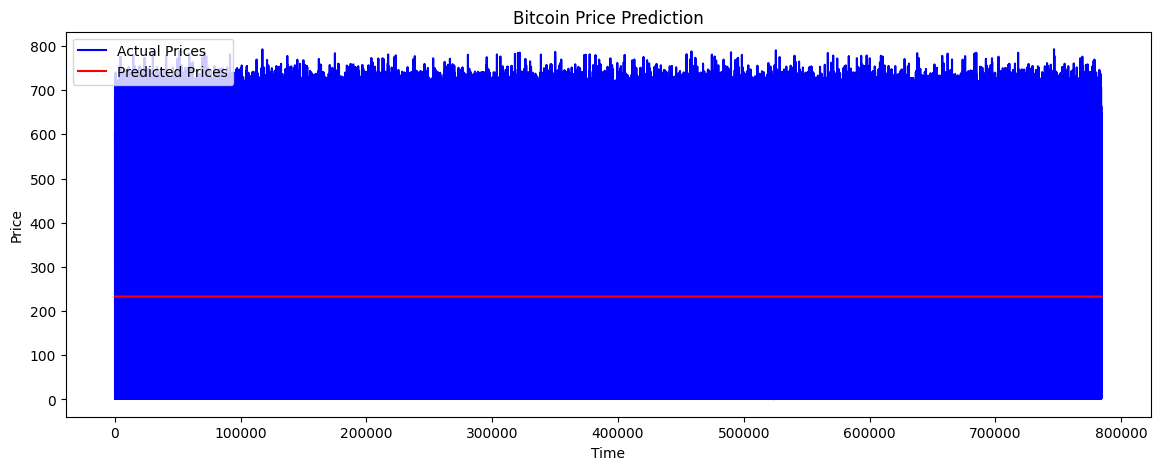

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color='blue', label='Actual Prices')
plt.plot(y_pred, color='red', label='Predicted Prices')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()